# 도형 그리기

## 빈 스케치북 만들기

In [2]:
import cv2
import numpy as np

In [4]:
# 세로 480 x 가로 640, 3 Channel (RGB) 에 해당하는 스케치북 만들기
img = np.zeros((480, 640, 3), dtype=np.uint8) 

# zeros : 공간을 0으로 채워라, 튜플 형태로 원하는 값 채우기
# 실행하면 다 0 으로 채워짐

# img[:] = (255, 255, 255) # 전체 공간을 흰 색으로 채우기
# BGR 선언 -> 파이썬에선 RGB가 아니라 BGR순임
# print(img)하면 다 255로 채워진 값 나옴
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 결과값

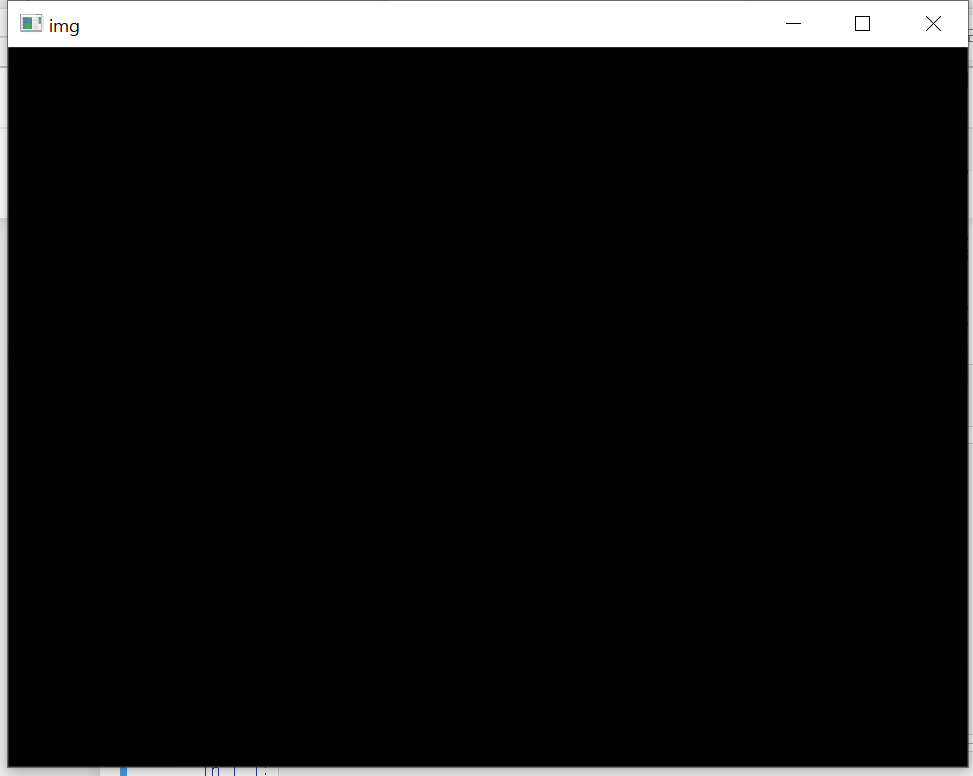

## 일부 영역 색칠

In [5]:
import cv2
import numpy as np

img = np.zeros((480, 640, 3), dtype=np.uint8)
img[100:200, 200:300] = (255, 255, 255)
# [세로 영역, 가로 영역]
# 세로기준으로 100에서 200까지, 가로기준으로 200에서 300까지 채우겠다 흰색을 (255,255,255)는 흰색임

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 결과값 
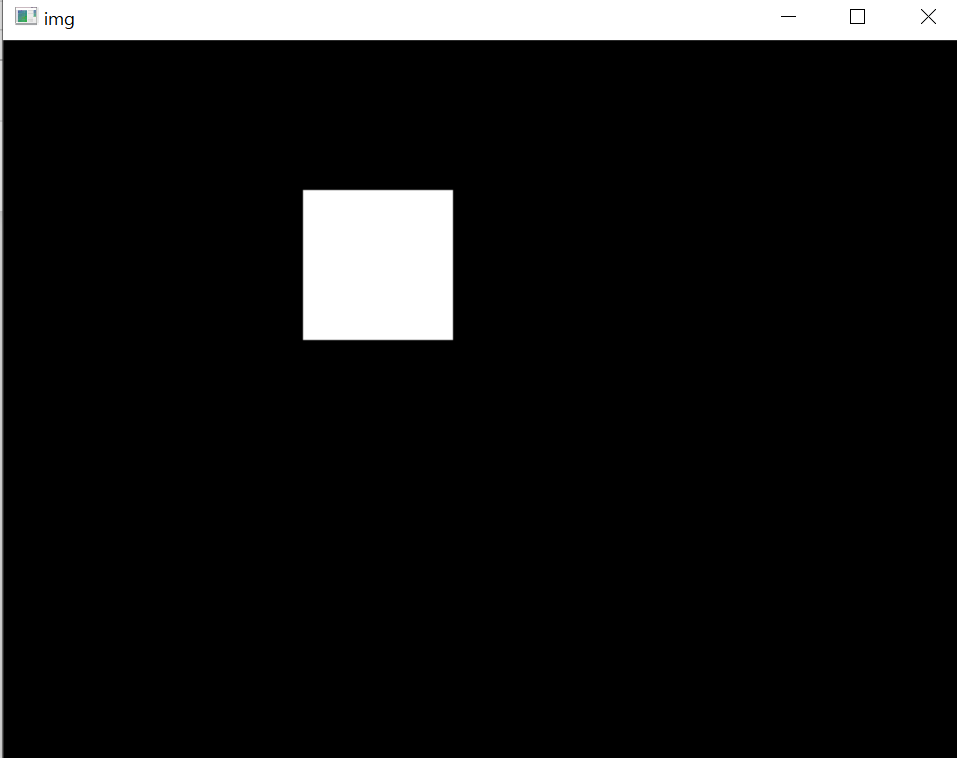

## 직선
직선의 종류 (line type)

1. cv2.LINE_4 : 상하좌우 4 방향으로 연결된 선
1. cv2.LINE_8 : 대각선을 포함한 8 방향으로 연결된 선 (기본값)
1. cv2.LINE_AA : 부드러운 선 (anti-aliasing)

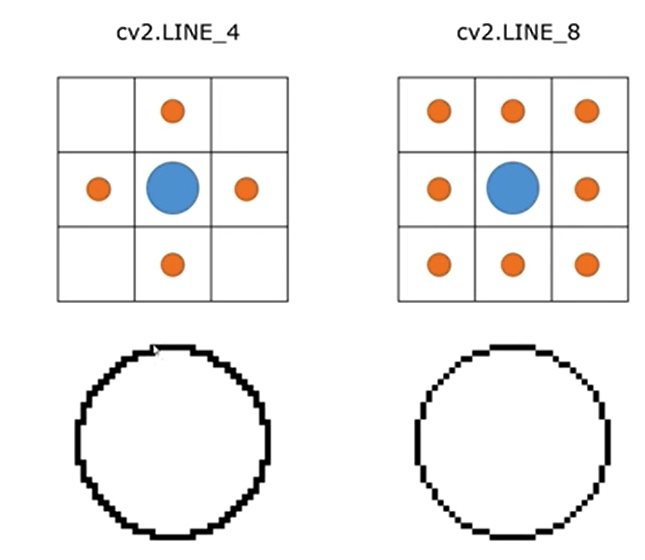

In [6]:
import cv2
import numpy as np

img = np.zeros((480, 640, 3), dtype=np.uint8)

COLOR = (0, 255, 255) # BGR : Yellow, 색깔
THICKNESS = 3 # 두께

cv2.line(img, (50, 100), (400, 50), COLOR, THICKNESS, cv2.LINE_8)
# 그릴 위치, 시작 점, 끝 점, 색깔, 두께, 선 종류
# 시작점 (50,100)이라는 좌표점(x,y)에서 부터 끝점 (400,50)이라는 좌표점까지 
#color는 위에서 쓴 color가져옴
#thickness도 동일
#cv2.LINE_8로 그리기
cv2.line(img, (50, 200), (400, 150), COLOR, THICKNESS, cv2.LINE_4)
cv2.line(img, (50, 300), (400, 250), COLOR, THICKNESS, cv2.LINE_AA)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 결과값

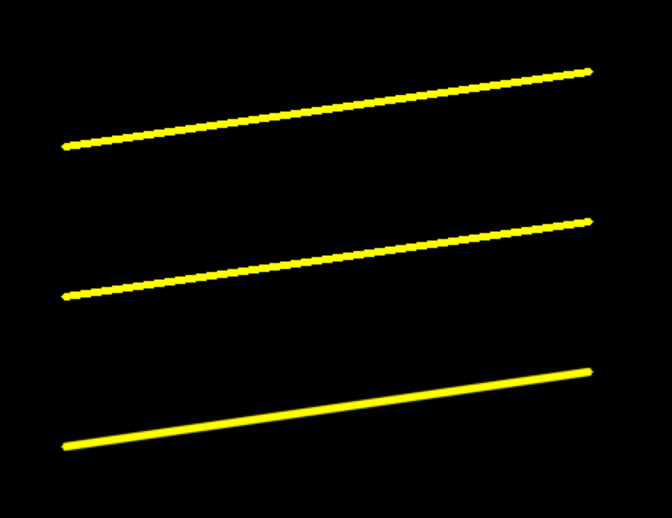

# 도형그리는 함수

1. 원 : cv2.circle
- 그려볼 스케치북(공간), 원 중심점, 반지름, 색깔, 두께, 선종류

2. 사각형 : cv2.rectangle
- 그릴 위치, 왼쪽 위 좌표, 오른쪽 아래 좌표, 색깔, 두께

3. 다각형 : cv2.polylines
- 그릴 위치, 그릴 좌표들, 닫힘 여부, 색깔, 두께, 선 종류


---------------------------------------------

- thickness대신 cv2.FILLED를 써서 꽉 채워도 됨
- 단, 다각형의 경우 점들을 직접 설정해줘야함

## 원

In [13]:
import cv2
import numpy as np

img = np.zeros((480, 640, 3), dtype=np.uint8)

COLOR = (255, 255, 0) # BGR 옥색
RADIUS = 50 # 반지름
THICKNESS = 10 # 두께

cv2.circle(img, (200, 100), RADIUS, COLOR, THICKNESS, cv2.LINE_AA) # 속이 빈 원
# 그릴 위치, 원의 중심점, 반지름, 색깔, 두께, 선 종류
cv2.circle(img, (400, 100), RADIUS, COLOR, cv2.FILLED, cv2.LINE_AA) # 꽉 찬 원 -> cv2.FILLED/-1하면 됨
# cv2.circle(img, (400, 100), RADIUS, COLOR, -1, cv2.LINE_AA)

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 사각형

In [15]:
import cv2
import numpy as np

img = np.zeros((480, 640, 3), dtype=np.uint8)

COLOR = (0, 255, 0) # BGR 초록색
THICKNESS = 3 # 두께

cv2.rectangle(img, (100, 100), (200, 200), COLOR, THICKNESS) # 속이 빈 사각형
# 그릴 위치, 왼쪽 위 좌표, 오른쪽 아래 좌표, 색깔, 두께
cv2.rectangle(img, (300, 100), (400, 300), COLOR, cv2.FILLED) # 꽉 찬 사각형

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## 다각형

In [7]:
import cv2
import numpy as np

img = np.zeros((480, 640, 3), dtype=np.uint8)

COLOR = (0, 0, 255) # BGR 빨간색
THICKNESS = 3 # 두께

pts1 = np.array([[100, 100], [200, 100], [100, 200]])
pts2 = np.array([[200, 100], [300, 100], [300, 200]])
#각각 []가 세개의 점 -> 리스트로 감싼거 점세개를 이으면 삼각형이됨


# cv2.polylines(img, [pts1], True, COLOR, THICKNESS, cv2.LINE_AA)
# 앞서 정의한 pts1은 대괄호 안에 넣어줘야 함
# cv2.polylines(img, [pts2], True, COLOR, THICKNESS, cv2.LINE_AA)
cv2.polylines(img, [pts1, pts2], True, COLOR, THICKNESS, cv2.LINE_AA) # 속이 빈 다각형
# 그릴 위치, 그릴 좌표들, 닫힘 여부, 색깔, 두께, 선 종류
# true -> false로 하면 끝점이 연결이 안됨

pts3 = np.array([[[100, 300], [200, 300], [100, 400]], [[200, 300], [300, 300], [300, 400]]])
cv2.fillPoly(img, pts3, COLOR, cv2.LINE_AA) # 꽉 찬 다각형
# 그릴 위치, 그릴 좌표들, 색깔, 선 종류

cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 결과
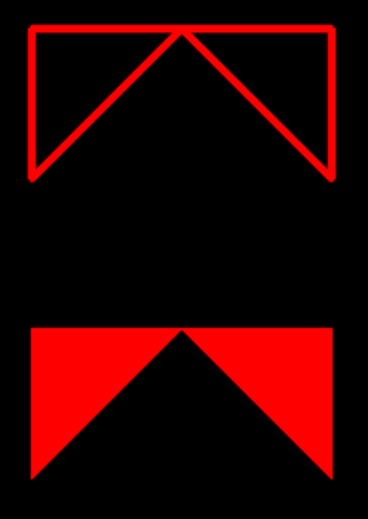